<a href="https://colab.research.google.com/github/G0807/vendas-kaggle/blob/main/vendasKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analize de dados vendas arquivo do Kaggle

Olá! Sou a Ana, diretora de marketing da **"Moda Sustentável Online"**, uma e-commerce de roupas e acessórios ecológicos.

Recebemos um volume crescente de dados de vendas e, para ser sincera, estamos um pouco perdidos em como tirar o máximo proveito deles. Tenho esse arquivo com informações sobre as vendas, contendo `namesale_id`, `product_id`, `productprice_y`, `quantity`, `price_x`, `created_at`, `updated_at` e `email`.

Precisamos de uma análise aprofundada para entender melhor o comportamento dos nossos clientes e otimizar nossas estratégias.

**Em linhas gerais, gostaríamos de saber:**

* **Quais são os produtos mais vendidos** e qual o **ticket médio** por produto?
* Existe algum **padrão de compra** em relação a quantidade e preço dos produtos?
* Conseguimos identificar **clientes mais engajados** (que compram com mais frequência ou gastam mais)?
* Há alguma **tendência de vendas** ao longo do tempo (dias da semana, meses)?

Nosso objetivo é usar essas informações para personalizar ofertas, melhorar a gestão de estoque e, claro, aumentar nossas vendas. Você pode nos ajudar com isso?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vendas_df = pd.read_csv('/content/tudo.csv')
display(vendas_df)

,name,sale_id,product_id,product,price_y,quantity,price_x,created_at,updated_at,email
0,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,3.89990,2433.800,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
1,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,4.00000,1196.580,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
2,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,1.38452,1975.000,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
3,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.22500,119.526,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
4,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.89000,2386.940,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
...,...,...,...,...,...,...,...,...,...,...
44495,Ashlynn Jaskolski,3d9d0fd1-0406-3ee8-84ee-5a29be946b2b,235,Roselyn Road,3366.300,3.00000,3455.700,2019-12-10 02:43:34+00:00,1981-04-24 06:20:37+00:00,leffler.mafalda@example.net
44496,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,2.45209,1896.100,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net
44497,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,3.08220,3997.900,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net
44498,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,1.00000,2695.000,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net


Tratando o dataframe.

In [3]:
print(vendas_df.dtypes)

name           object
sale_id        object
product_id      int64
product        object
price_y       float64
quantity      float64
price_x       float64
created_at     object
updated_at     object
email          object
dtype: object


In [37]:
#vendas_df['quantity'] = vendas_df['quantity'].astype(int)
#print(vendas_df.dtypes)

Os itens crested_at e update_at precisa ser tratado, tipo datetime.

In [4]:
vendas_df['created_at'] = pd.to_datetime(vendas_df['created_at'])
vendas_df['updated_at'] = pd.to_datetime(vendas_df['updated_at'])
print(vendas_df.dtypes)

name                       object
sale_id                    object
product_id                  int64
product                    object
price_y                   float64
quantity                  float64
price_x                   float64
created_at    datetime64[ns, UTC]
updated_at    datetime64[ns, UTC]
email                      object
dtype: object


Veficando se há NaN.

In [5]:
vendas_df.isnull().sum()

,0
name,0
sale_id,0
product_id,0
product,0
price_y,0
quantity,0
price_x,0
created_at,0
updated_at,0
email,0


Verificando se há linhas repetidas.3

In [6]:
duplicadas = vendas_df.duplicated()
print(duplicadas.sum())

0


EDA, analize exploratoria.

In [7]:
vendas_df.describe()

,product_id,price_y,quantity,price_x
count,44500.000000,44500.000000,44500.000000,44500.000000
mean,300.387640,1897.930295,2.505359,1999.161519
std,57.734845,1144.833746,1.446676,1155.451744
min,201.000000,58.000000,0.000000,0.055818
25%,250.000000,902.364000,1.241923,994.173000
50%,300.000000,1754.000000,2.500000,2001.355000
75%,350.000000,2988.600000,3.779000,3001.707500
max,400.000000,3982.340000,5.000000,4000.000000


In [9]:
vendas_df.shape

(44500, 10)

,price_x
product_id,
371,493558.85510
208,488999.38316
279,485298.79020
272,480334.64540
273,479509.35370


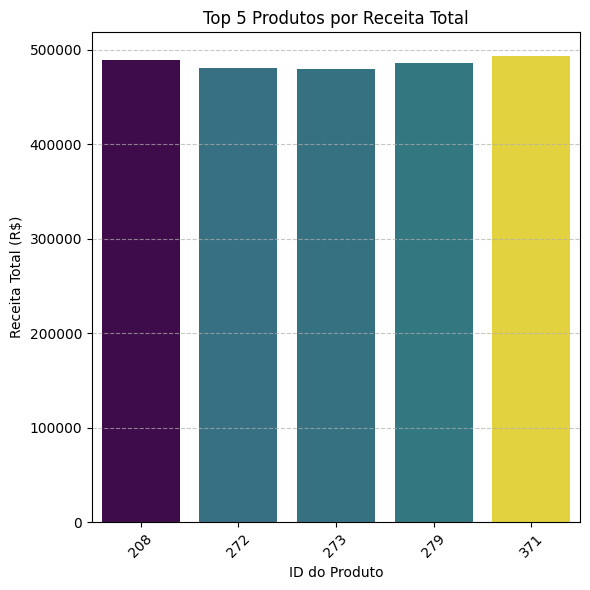

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
top_produtos = vendas_df[['product_id','price_x']].groupby('product_id').sum().sort_values(by='price_x', ascending=False).head(5)
display(top_produtos)

plt.figure(figsize=(6, 6))
sns.barplot(x=top_produtos.index, y=top_produtos['price_x'],hue=top_produtos.index, palette='viridis',legend=False)
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.title('Top 5 Produtos por Receita Total')
plt.xlabel('ID do Produto')
plt.ylabel('Receita Total (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:

# Pega a lista dos IDs dos top 5 produtos
top_5_product_ids = top_produtos.index.tolist()

# 2. Filtrar o DataFrame apenas para os Top 5 Produtos
df_top_5 = vendas_df[vendas_df['product_id'].isin(top_5_product_ids)]

# 3. Calcular o Ticket Médio para cada um desses Top 5 Produtos
#    a) Soma da Receita Total para cada um dos Top 5 produtos (já temos em top_produtos_receita)
#    b) Contagem de Ocorrências (quantas vezes cada um desses Top 5 produtos aparece no DF filtrado)
ocorrencias_top_5 = df_top_5['product_id'].value_counts().loc[top_5_product_ids] # Garante a ordem dos top 5

# Criar um DataFrame para o Ticket Médio
ticket_medio_top_5 = pd.DataFrame({
    'Receita Total': top_produtos['price_x'],
    'Numero de Ocorrencias': ocorrencias_top_5
})

# Calcular o Ticket Médio
ticket_medio_top_5['Ticket Medio por Ocorrencia'] = ticket_medio_top_5['Receita Total'] / ticket_medio_top_5['Numero de Ocorrencias']

# Exibir os resultados
print("\nTop 5 Produtos por Receita e Seus Tickets Médios por Ocorrência:")
display(ticket_medio_top_5)
total_vendas_por_pedido = vendas_df.groupby('sale_id')['price_x'].sum()
ticket_medio_geral_pedido = total_vendas_por_pedido.mean()
print(f"\nTicket Médio Geral por Pedido (sale_id): R$ {ticket_medio_geral_pedido:.2f}")


Top 5 Produtos por Receita e Seus Tickets Médios por Ocorrência:


,Receita Total,Numero de Ocorrencias,Ticket Medio por Ocorrencia
product_id,,,
371,493558.85510,222,2223.238086
208,488999.38316,223,2192.822346
279,485298.79020,223,2176.227759
272,480334.64540,223,2153.967020
273,479509.35370,223,2150.266160



Ticket Médio Geral por Pedido (sale_id): R$ 8896.27


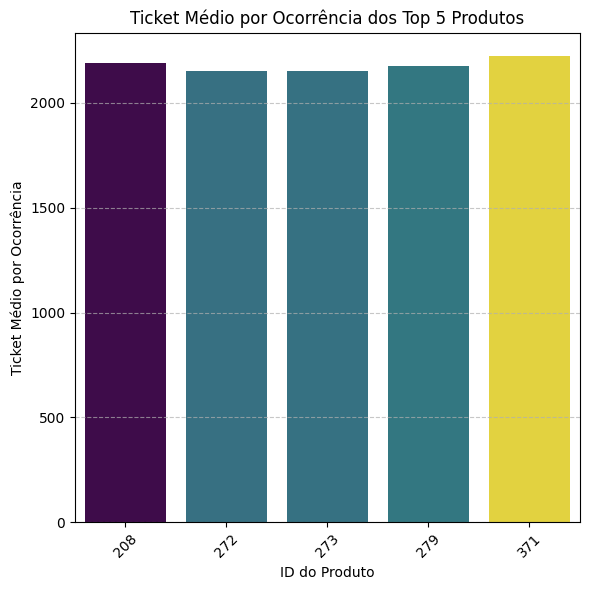

In [52]:
plt.figure(figsize=(6,6))
sns.barplot(x=ticket_medio_top_5.index, y=ticket_medio_top_5['Ticket Medio por Ocorrencia'], hue=ticket_medio_top_5.index, palette='viridis',legend=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Ticket Médio por Ocorrência dos Top 5 Produtos')
plt.xlabel('ID do Produto')
plt.ylabel('Ticket Médio por Ocorrência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Existe algum padrão de compra em relação a quantidade e preço dos produtos?

,quantity
product_id,
384,523
209,521
276,513
238,503
331,499


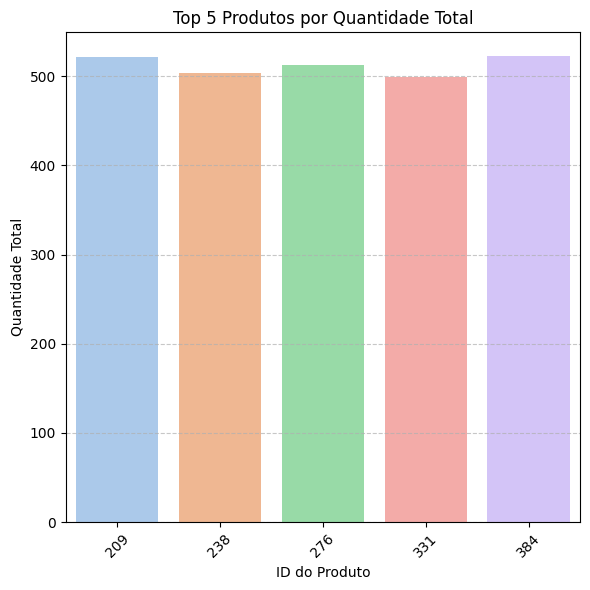

In [50]:
#pegando os 5 produtos com maior quantidade de vendas
quantidade_por_produto =  vendas_df[['product_id','quantity']].groupby('product_id').sum().sort_values(by='quantity', ascending=False).head(5)
display(quantidade_por_produto)

plt.figure(figsize=(6, 6))
sns.barplot(x=quantidade_por_produto.index,          # Eixo X: ID do Produto
            y=quantidade_por_produto['quantity'],     # Eixo Y: Quantidade Total
            hue=quantidade_por_produto.index,         # Use o índice (IDs do produto) para o hue
            palette='pastel',
            legend=False)                             # Desabilite a legenda para evitar duplicação
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Top 5 Produtos por Quantidade Total')
plt.xlabel('ID do Produto')
plt.ylabel('Quantidade Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [84]:
quantidade_por_produto =  vendas_df[['product_id','quantity']].groupby('product_id').sum().sort_values(by='quantity', ascending=False).head(5)
lista_id = quantidade_por_produto.index.tolist()
#1. Filtre o DataFrame para conter apenas as linhas dos top 5 produtos
df_top_5_produtos_filtrado = vendas_df[vendas_df['product_id'].isin(lista_id)]

# 2. Selecione a coluna 'productprice_y' DESSES produtos
#    Você pode querer o preço unitário médio se o preço variar ao longo do tempo,
#    ou apenas a lista de todos os preços que apareceram para esses produtos.

# Opção A: Exibir todos os preços unitários encontrados para esses produtos
print("Todos os preços unitários das ocorrências dos Top 5 produtos (com duplicatas):")
display(df_top_5_produtos_filtrado[['product_id', 'price_y']])

# Opção B: Exibir o preço unitário médio (se houver variação no preço do mesmo produto)
print("\nPreço Unitário Médio para cada um dos Top 5 Produtos:")
precos_medios = df_top_5_produtos_filtrado.groupby('product_id')['price_y'].mean().loc[lista_id]
display(precos_medios)

# Opção C: Exibir apenas os preços unitários únicos para cada um dos Top 5 produtos
print("\nPreços Unitários Únicos para cada um dos Top 5 Produtos:")
precos_unicos = df_top_5_produtos_filtrado.groupby('product_id')['price_y'].unique().loc[lista_id]
display(precos_unicos)




Todos os preços unitários das ocorrências dos Top 5 produtos (com duplicatas):


,product_id,price_y
2447,238,1459.38
2448,238,1459.38
2449,238,1459.38
2450,238,1459.38
2451,238,1459.38
...,...,...
39600,384,2934.18
39601,384,2934.18
39602,384,2934.18
39603,384,2934.18



Preço Unitário Médio para cada um dos Top 5 Produtos:


,price_y
product_id,
384,2934.180
209,3154.820
276,1026.110
238,1459.380
331,693.171



Preços Unitários Únicos para cada um dos Top 5 Produtos:


,price_y
product_id,
384,[2934.18]
209,[3154.82]
276,[1026.11]
238,[1459.38]
331,[693.171]
